# Data Exploration, Cleaning, and Preparation

In this section, we will explore the dataset, clean the data, and prepare it for analysis.


In [59]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Load data
df=pd.read_csv("Office Supplies Store.csv")

In [3]:
#Look at first five rows
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,total cost
0,4-Jul-14,East,Richard,Pen Set,62,4.99,309.38
1,12-Jul-14,East,Nick,Binder,29,1.99,57.71
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49,686.95
3,29-Jul-14,East,Susan,Binder,81,19.99,1619.19
4,7-Aug-14,Central,Matthew,Pen Set,42,23.95,1005.90


In [4]:
#Look at the stats of the data 
df.describe()

,Units,Unit Price,total cost
count,43.000000,43.000000,43.000000
mean,49.325581,20.308605,456.462326
std,30.078248,47.345118,447.022104
min,2.000000,1.290000,9.030000
25%,27.500000,3.990000,144.590000
50%,53.000000,4.990000,299.400000
75%,74.500000,17.990000,600.180000
max,96.000000,275.000000,1879.060000


In [5]:
#Look at the columns I have
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'total cost '],
      dtype='object')

In [6]:
#Check for nulls 
df.isna().sum()

OrderDate      0
Region         0
Rep            0
Item           0
Units          0
Unit Price     0
total cost     0
dtype: int64

In [7]:
#Check Columns Type
df.dtypes

OrderDate       object
Region          object
Rep             object
Item            object
Units            int64
Unit Price     float64
total cost     float64
dtype: object

In [8]:
#Change OrderDate column into a datetime column rather than string

df['OrderDate']= pd.to_datetime(df['OrderDate'])

In [9]:
#Check Columns Type to verify 
df.dtypes

OrderDate      datetime64[ns]
Region                 object
Rep                    object
Item                   object
Units                   int64
Unit Price            float64
total cost            float64
dtype: object

In [10]:
#Check the name to elimiate the extra spacing
df['Total_cost']=df['total cost ']

In [11]:
# Drop column with the extra space
df = df.drop(['total cost '], axis=1)

In [12]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total_cost'],
      dtype='object')

# Analyze the data, and answer the questions 

In this section, I will anaylze the data more in depth and answer some questions for the Executives and Senior Management.

## What is our total revenue for the past year, and how does it compare to the previous year?

In [13]:
#Let's look at each year
df['Year']=df['OrderDate'].dt.year
df['Year'].unique()

array([2014, 2015], dtype=int64)

In [14]:
# Calculate revenue per year
yearly_revenue = df.groupby('Year')['Total_cost'].sum()

# Calculate total revenue for 2014 and 2015
total_revenue_2014 = yearly_revenue.get(2014, 0)
total_revenue_2015 = yearly_revenue.get(2015, 0)

# Print the results
print(f"Total Revenue for 2014: ${total_revenue_2014:.2f}")
print(f"Total Revenue for 2015: ${total_revenue_2015:.2f}")

Total Revenue for 2014: $11451.71
Total Revenue for 2015: $8176.17


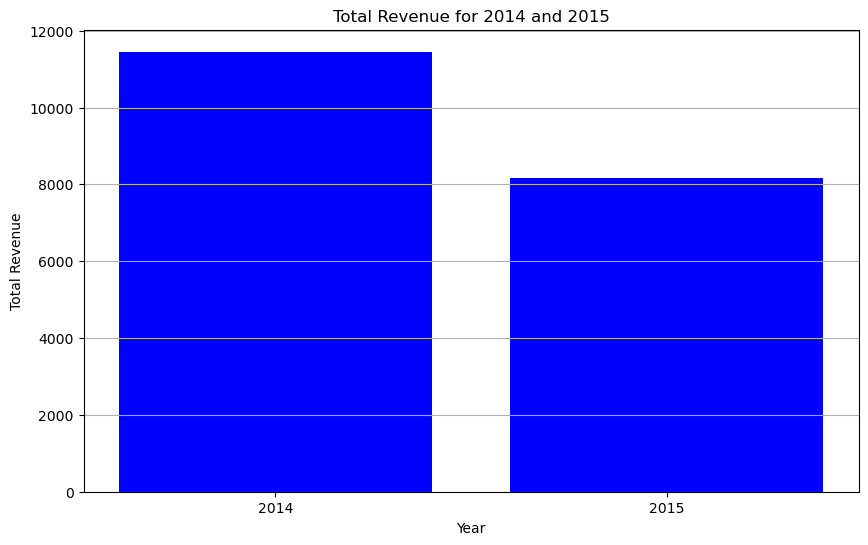

In [15]:
# Create bar chart for both years
plt.figure(figsize=(10, 6))
plt.bar(yearly_revenue.index, yearly_revenue.values, color='b')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue for 2014 and 2015')
plt.xticks(yearly_revenue.index, [str(year) for year in yearly_revenue.index])  # Set x-axis labels
plt.grid(axis='y')
plt.show()

In [16]:
# Calculate the difference between 2015 and 2014
revenue_difference = total_revenue_2015 - total_revenue_2014

# Calculate the percentage change
percentage_change = (revenue_difference / total_revenue_2014) * 100

# Print the results
print(f"Total Revenue for 2014: ${total_revenue_2014:.2f}")
print(f"Total Revenue for 2015: ${total_revenue_2015:.2f}")
print(f"Percentage Change: {percentage_change:.2f}%")

Total Revenue for 2014: $11451.71
Total Revenue for 2015: $8176.17
Percentage Change: -28.60%


## Which product categories contribute the most to our revenue, and are there any declining categories?

In [17]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total_cost', 'Year'],
      dtype='object')

In [18]:
# Group by 'Item' and calculate the total revenue for each product category
product_revenue = df.groupby('Item')['Total_cost'].sum().sort_values(ascending = False)
print(product_revenue)

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total_cost, dtype: float64


In [19]:
# Print the product categories contributing the most to revenue
print("Product Categories Contributing the Most to Revenue: ")
print(product_revenue.index[0]) 

Product Categories Contributing the Most to Revenue: 
Binder


In [20]:
# Identify declining categories (categories with decreasing revenue)
# To do this, you can calculate the percentage change in revenue
percentage_change = round(product_revenue.pct_change()*100,2)
declining_categories = percentage_change[percentage_change < 0]

print("\nDeclining Categories (Negative Percentage Change):")

# Iterate through declining categories and print with '%' sign
for category, percent_change in declining_categories.items():
    print(f"{category}: {percent_change:.2f}%")


Declining Categories (Negative Percentage Change):
Pen Set: -56.46%
Pencil: -48.80%
Pen: -4.21%
Desk: -16.88%


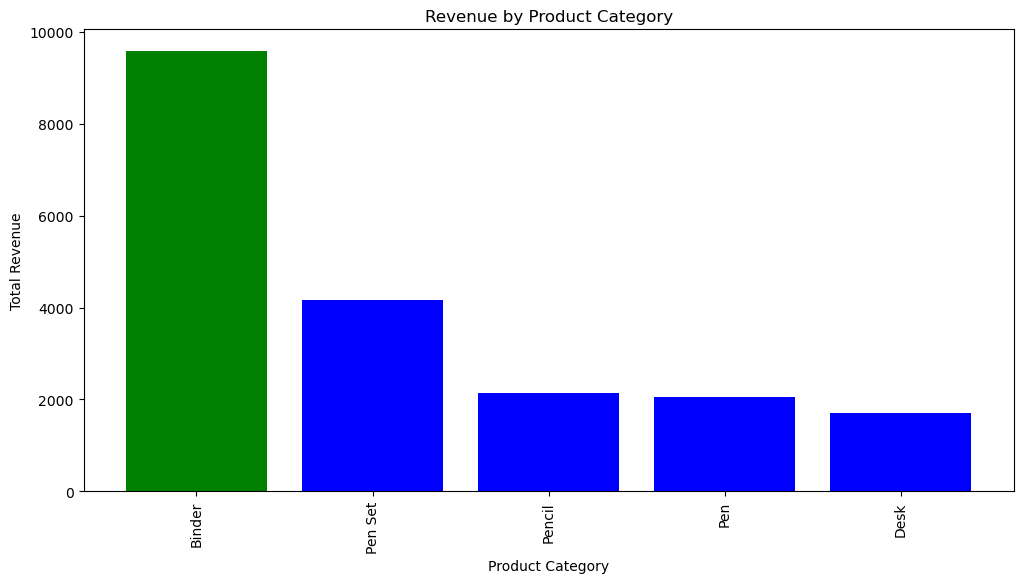

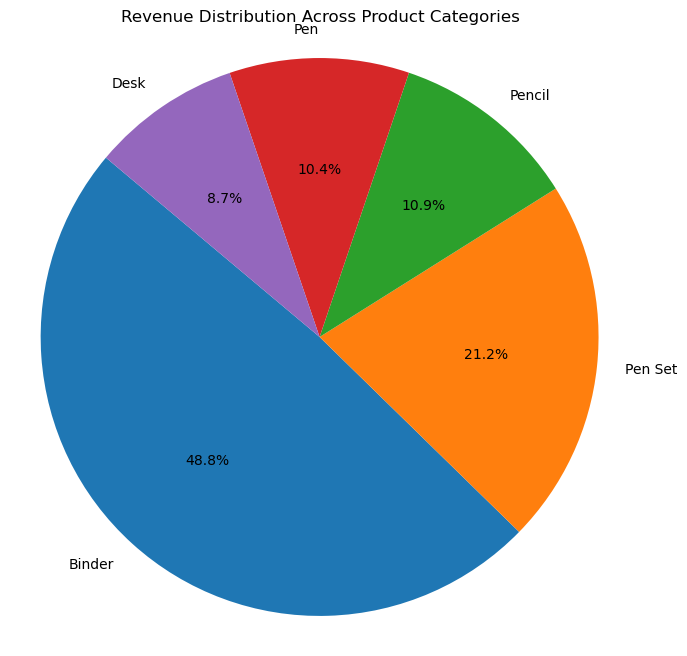

In [21]:
# Identify the top contributing category (the first element after sorting)
top_category = product_revenue.index[0]

# Create a list of colors for each bar, with the top category in a different color
colors = ['b' if item != top_category else 'g' for item in product_revenue.index]

# Create a bar chart to show all product categories and their revenue with the top category in green
plt.figure(figsize=(12, 6))
plt.bar(product_revenue.index, product_revenue.values, color=colors)
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product Category')
plt.xticks(rotation=90)  # Rotate category labels for readability
plt.show()

# Create a pie chart to show the distribution of revenue across categories
plt.figure(figsize=(8, 8))
plt.pie(product_revenue, labels=product_revenue.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Revenue Distribution Across Product Categories')
plt.show()

# How have our sales been distributed across different regions, and are there any regions where we should focus more attention?

In [22]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total_cost', 'Year'],
      dtype='object')

In [23]:
# Group by 'Region' and calculate the total revenue for each region
regions_revenue = df.groupby('Region')['Total_cost'].sum().sort_values()
regions_revenue

Region
West        2486.72
East        6002.09
Central    11139.07
Name: Total_cost, dtype: float64

In [24]:
# Identify the lowest revenue region
lowest_region = regions_revenue.idxmin()

# Print a sentence about the lowest revenue region
print(f"The region with the lowest revenue is {lowest_region}.")

The region with the lowest revenue is West.


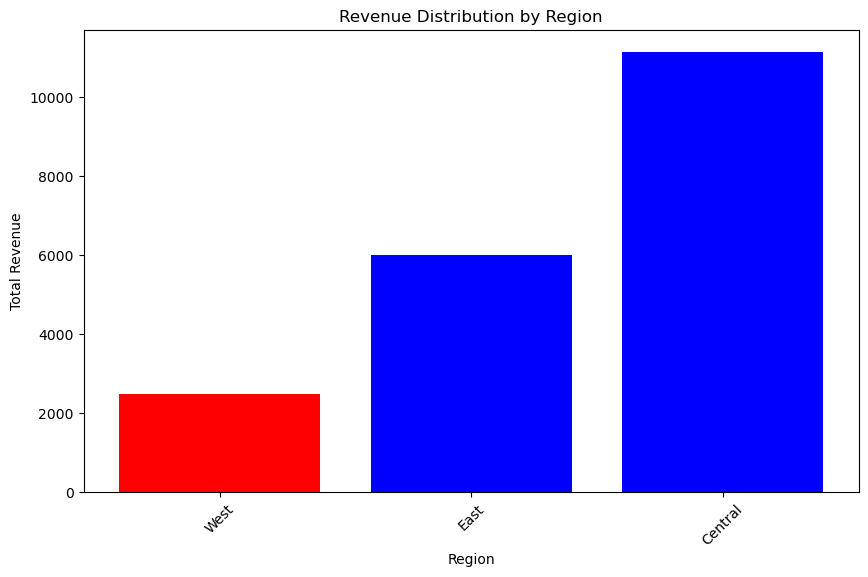

In [25]:
# Create a bar chart to show revenue distribution by region
plt.figure(figsize=(10, 6))
plt.bar(regions_revenue.index, regions_revenue.values, color='b')

# Highlight the lowest revenue region in a different color (e.g., red)
plt.bar(lowest_region, regions_revenue[lowest_region], color='r')

plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Revenue Distribution by Region')
plt.xticks(rotation=45)  # Rotate region labels for readability

plt.show()

## Who are our top-performing sales representatives, and how do their sales compare?

In [26]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total_cost', 'Year'],
      dtype='object')

In [27]:
# Group by 'Rep' and calculate the total sales for each rep
sales_rep_performance = df.groupby('Rep')['Total_cost'].sum().sort_values(ascending = False)
sales_rep_performance

Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Rachel      438.37
Name: Total_cost, dtype: float64

In [28]:
# Identify the top performing sales rep
top_performing_sales_rep = sales_rep_performance.idxmax()

# Print a sentence about the lowest revenue region
print(f"The the top performing sales rep is {top_performing_sales_rep}.")

The the top performing sales rep is Matthew.


In [29]:
print(f"Their total sales: {sales_rep_performance.iloc[0]}")

# Print a comparison of the top-performing rep's sales with others
for rep, total_sales in sales_rep_performance[1:].items():
    print(f"{top_performing_sales_rep}'s sales are {total_sales - sales_rep_performance.iloc[0]:.2f} lower than {rep}'s sales.")

Their total sales: 3109.44
Matthew's sales are -7.14 lower than Susan's sales.
Matthew's sales are -297.25 lower than Alex's sales.
Matthew's sales are -746.40 lower than Richard's sales.
Matthew's sales are -1359.57 lower than Bill's sales.
Matthew's sales are -1468.01 lower than Smith's sales.
Matthew's sales are -1721.67 lower than Morgan's sales.
Matthew's sales are -1825.83 lower than James's sales.
Matthew's sales are -1906.33 lower than Thomas's sales.
Matthew's sales are -2572.69 lower than Nick's sales.
Matthew's sales are -2671.07 lower than Rachel's sales.


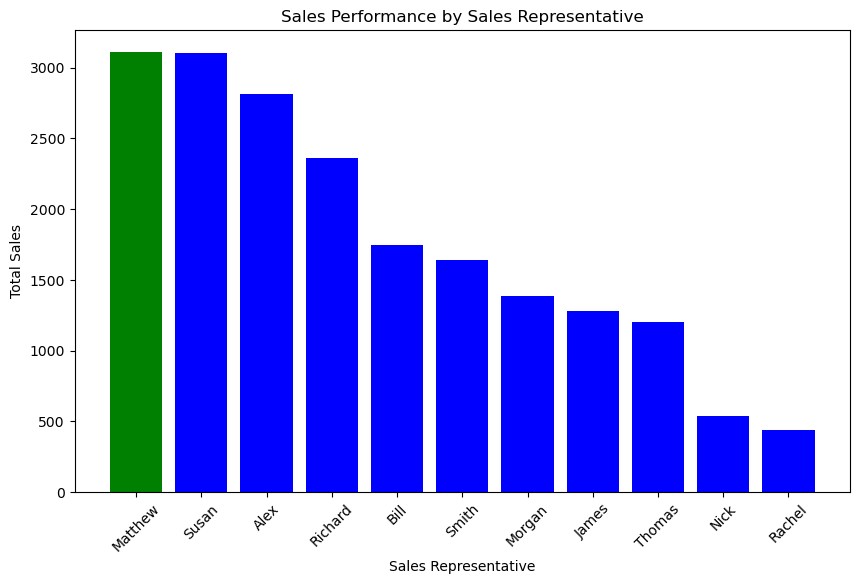

In [30]:
# Create a bar chart to show sales performance of all sales reps
plt.figure(figsize=(10, 6))
plt.bar(sales_rep_performance.index, sales_rep_performance.values, color='b')

# Highlight the top-performing sales rep in a different color (e.g., green)
plt.bar(top_performing_sales_rep, sales_rep_performance.loc[top_performing_sales_rep], color='g')

plt.xlabel('Sales Representative')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Sales Representative')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

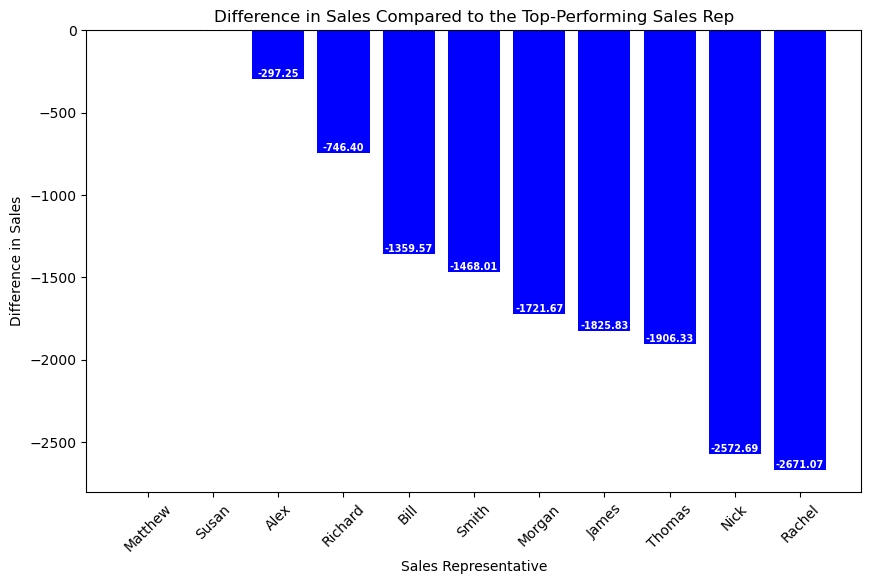

In [31]:
# Calculate the difference in sales between the top-performing rep and others
difference_in_sales = sales_rep_performance - sales_rep_performance.loc[top_performing_sales_rep]

# Create a bar chart to show the difference in sales
plt.figure(figsize=(10, 6))
bars = plt.bar(difference_in_sales.index, difference_in_sales.values, color='b')

plt.xlabel('Sales Representative')
plt.ylabel('Difference in Sales')
plt.title('Difference in Sales Compared to the Top-Performing Sales Rep')
plt.xticks(rotation=45)  # Rotate labels for readability

# Annotate each bar with its value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=7,fontweight='bold', color='white')

plt.show()

## What is our average profit margin, and how does it vary by product category?

In [32]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total_cost', 'Year'],
      dtype='object')

In [33]:
# Calculate the total profit for each product category
total_profit_by_item = df.groupby('Item')['Total_cost'].sum()

# Calculate the average profit margin for each product category
average_profit_margin_by_item = (total_profit_by_item / total_profit_by_item.sum()).sort_values(ascending=False)

# round the average profit margin to 2 decimals 
round(average_profit_margin_by_item,2)

# Create a DataFrame for the results
Average_Profit_Margin_df = pd.DataFrame({'Product Category': average_profit_margin_by_item.index, 'Average Profit Margin': round(average_profit_margin_by_item, 2)})

# Print the table without the index
print("Average Profit Margin by Product Category:")
print(Average_Profit_Margin_df.to_string(index=False))

Average Profit Margin by Product Category:
Product Category  Average Profit Margin
          Binder                   0.49
         Pen Set                   0.21
          Pencil                   0.11
             Pen                   0.10
            Desk                   0.09


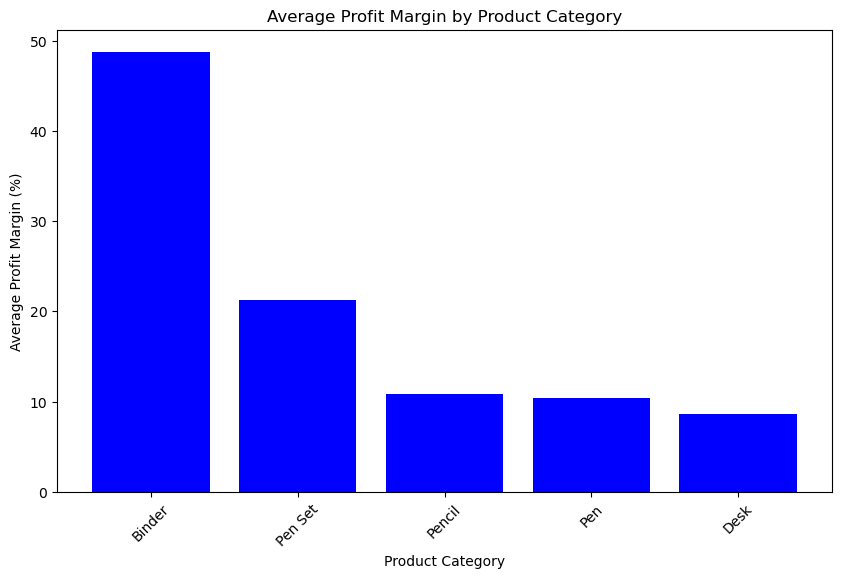

In [34]:
# Create a bar chart to visualize the average profit margins
plt.figure(figsize=(10, 6))
plt.bar(average_profit_margin_by_item.index, average_profit_margin_by_item.values * 100, color='b')

plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin (%)')
plt.title('Average Profit Margin by Product Category')
plt.xticks(rotation=45)  # Rotate labels for readability

plt.show()

## Are there any notable seasonal trends in our sales, and how can we prepare for them?

In [35]:
# Set 'OrderDate' as the index for time series analysis
df.set_index('OrderDate', inplace=True)

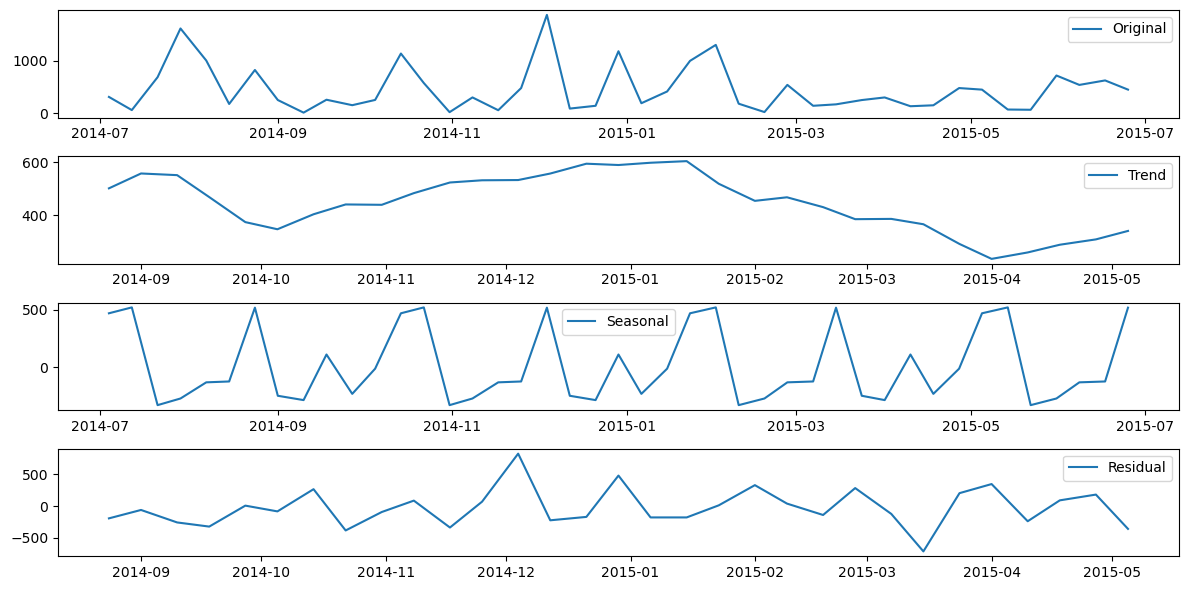

In [36]:
# Perform seasonal decomposition
result = seasonal_decompose(df['Total_cost'], model='additive', period=12 )  # You can adjust the 'freq' parameter based on your data

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(df['Total_cost'], label='Original')
plt.legend(loc='best')

# Plot the trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')

# Plot the seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='best')

# Plot the residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## What are our highest and lowest selling products, and should we consider adjusting our product offerings?

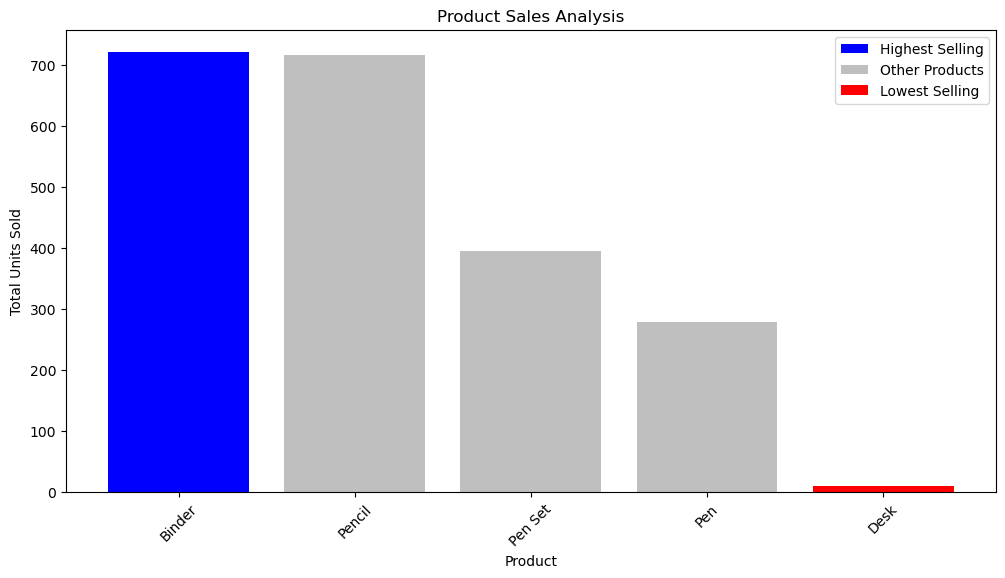

In [43]:
# Group by 'Item' and calculate the total units sold for each product
product_units_sold = df.groupby('Item')['Units'].sum()

# Sort products by total units sold in descending order
product_units_sold = product_units_sold.sort_values(ascending=False)

# Create a DataFrame for the rest of the products
rest_of_products = product_units_sold.iloc[1:]

# Separate the highest and lowest selling products
highest_selling = product_units_sold.head(1)
lowest_selling = product_units_sold.tail(1)

# Combine the highest, lowest, and rest of the products for plotting
combined_products = pd.concat([highest_selling, rest_of_products, lowest_selling])

# Plot the data in descending order
plt.figure(figsize=(12, 6))

# Plot the highest selling product in a different color (e.g., blue)
plt.bar(highest_selling.index, highest_selling.values, color='blue', label='Highest Selling')

# Plot the rest of the products in grey
plt.bar(rest_of_products.index, rest_of_products.values, color='grey', alpha=0.5, label='Other Products')

# Plot the lowest selling product in a different color (e.g., red)
plt.bar(lowest_selling.index, lowest_selling.values, color='red', label='Lowest Selling')

plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Product Sales Analysis')
plt.xticks(rotation=45)
plt.legend()

plt.show()

# Do we have any issues with inventory management, such as overstocked or slow-moving items?

In [48]:
df.columns

Index(['Region', 'Rep', 'Item', 'Units', 'Unit Price', 'Total_cost', 'Year'], dtype='object')

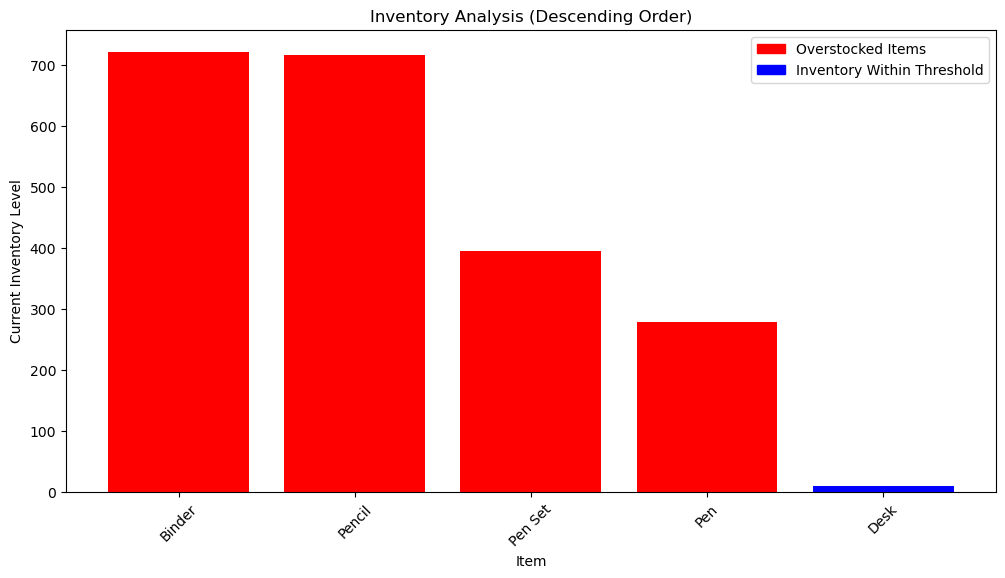

Overstocked items: Binder, Pen, Pen Set, Pencil


In [66]:
# Group by 'Item' and calculate the total units sold for each product
product_units_sold = df.groupby('Item')['Units'].sum()

# Calculate inventory turnover rate (for simplicity, using a predefined threshold)
threshold = 0.5  # Adjust this threshold 
inventory_turnover = df.groupby('Item')['Total_cost'].sum() / product_units_sold
slow_moving_items = inventory_turnover[inventory_turnover < threshold].index

# Identify overstocked items (for simplicity, using a predefined threshold)
overstocked_items = product_units_sold[product_units_sold > 100].index

# Combine overstocked and slow-moving items
issues_with_inventory = set(overstocked_items).union(set(slow_moving_items))

# Sort products by current inventory levels in descending order
sorted_products = product_units_sold.sort_values(ascending=False)

# Create a bar chart to visualize issues with inventory
plt.figure(figsize=(12, 6))
colors = ['red' if item in issues_with_inventory else 'blue' for item in sorted_products.index]
plt.bar(sorted_products.index, sorted_products.values, color=colors)
plt.xlabel('Item')
plt.ylabel('Current Inventory Level')
plt.title('Inventory Analysis (Descending Order)')
plt.xticks(rotation=45)

# Add a legend to differentiate between overstocked and slow-moving items
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Overstocked Items')
blue_patch = mpatches.Patch(color='blue', label='Inventory Within Threshold')
plt.legend(handles=[red_patch, blue_patch])

plt.show()

# Provide recommendations and actions based on the analysis
if overstocked_items.any():
    print(f"Overstocked items: {', '.join(overstocked_items)}")
if slow_moving_items.any():
    print(f"Slow-moving items: {', '.join(slow_moving_items)}")


# Office Supplies Data Analysis Report

*Prepared by: Shekela*  

## Executive Summary

This report presents an analysis of office supplies sales data to provide valuable insights into various aspects of our office supplies business.

# Business Questions for Analysis

These questions are intended for analysis and reporting for executives, senior management, and various teams within the organization.

1. **What is our total revenue for the past year, and how does it compare to the previous year?**

2. **Which product categories contribute the most to our revenue, and are there any declining categories?**

3. **How have our sales been distributed across different regions, and are there any regions where we should focus more attention?**

4. **Who are our top-performing sales representatives, and how do their sales compare?**

5. **What is our average profit margin, and how does it vary by product category?**

6. **Are there any notable seasonal trends in our sales, and how can we prepare for them?**

7. **What are our highest and lowest selling products, and should we consider adjusting our product offerings?**

8. **Do we have any issues with inventory management, such as overstocked or slow-moving items?**


### 1.Total Revenue for 2014 and 2015

* Total Revenue for 2014: $11,451.71

* Total Revenue for 2015: $8,176.17

**Insight: Our total revenue decreased by approximately $3,275.54 (or 28.6%) from 2014 to 2015.***

This bar chart shows the total revenue for the years 2014 and 2015.


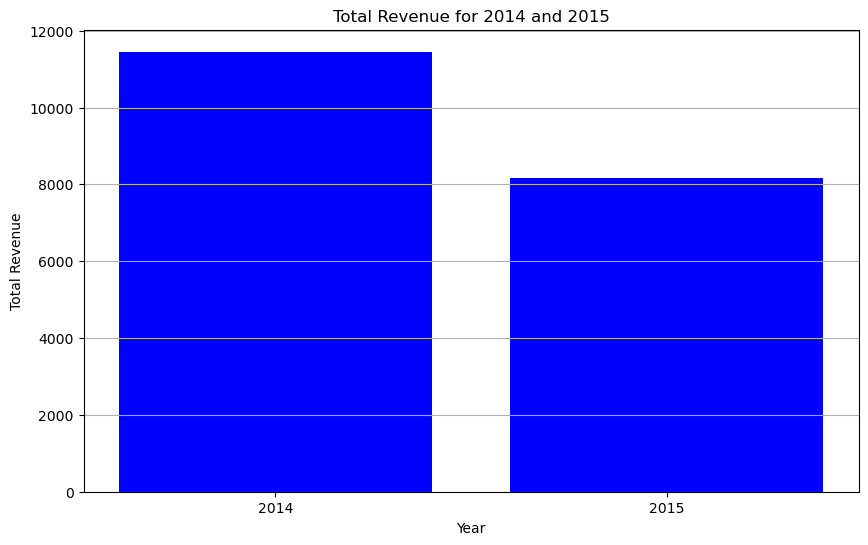

### 2. Product Categories Contributing the Most to Our Revenue and Identifying Declining Categories

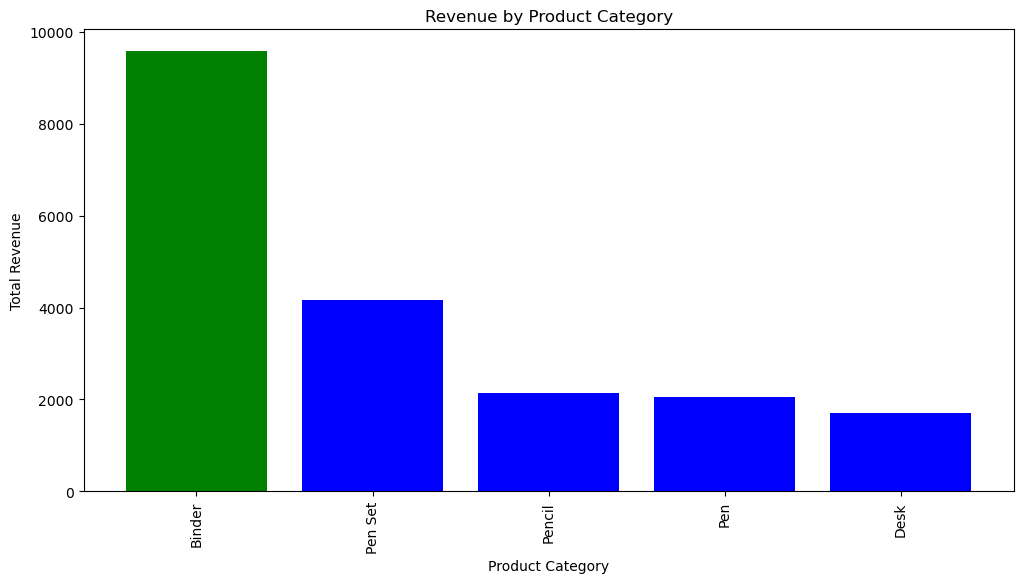

In this analysis, we delved into the contribution of different product categories to our overall revenue. The bar chart above illustrates the total revenue generated by each product category, highlighting the top revenue contributors. Among these categories, "Binders" stands out as the top revenue-generating category, making it a key driver of our sales.

However, it's equally important to identify categories that are experiencing declines in sales.

**Declining Categories (Negative Percentage Change):**
- Pen Set: -56.46%
- Pencil: -48.80%
- Pen: -4.21%
- Desk: -16.88%

The analysis reveals that the "Pen Set" category has seen a significant decline in revenue. This decline could be attributed to shifts in customer preferences, market competition, or other factors that may require further investigation.

**Insight: The "Binder" product category contributes the most to our revenue, while the "Pen Set" category has experienced a significant decline in sales.** These insights can inform our marketing and inventory strategies. We may consider allocating resources to promote top-performing categories and exploring ways to revitalize declining categories to achieve a balanced and profitable product portfolio.



### 3. Sales Distribution Across Different Regions and Areas for Improvement

Sales are distributed across three regions, with varying performance levels. Out of these three regions, the West region stands out as the lowest revenue contributor.

**Region Sales:** 


- West: $2,486.72

- East: $6,002.09

- Central: $11,139.07

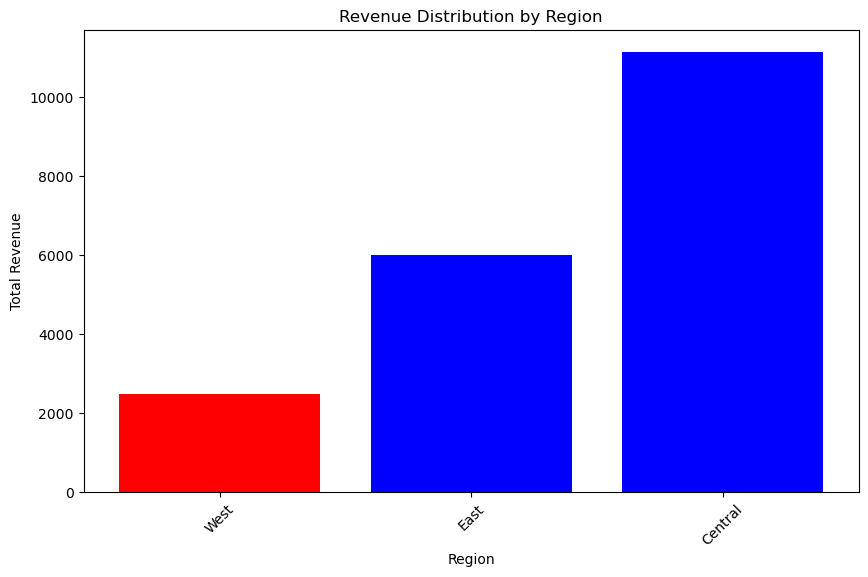

**Insight:** While the Central region appears to be the highest revenue contributor, **it's crucial to highlight that the West region has the lowest sales among the three areas.** This underscores the importance of focusing attention and implementing targeted strategies to boost sales and improve performance in the West region. Further analysis and action plans are recommended to address specific challenges and opportunities in this area.



### 4. Top-Performing Sales Representatives and Sales Comparisons

In our sales analysis, Matthew stands out as the highest-performing representative with total sales of $3,109.44, while we observe variations in performance compared to other representatives, as shown on the graph below



**Total Sales for Matthew:** $3,109.44

**Comparisons with Other Representatives:** Matthew's sales are lower than several other representatives, with variations in the differences.

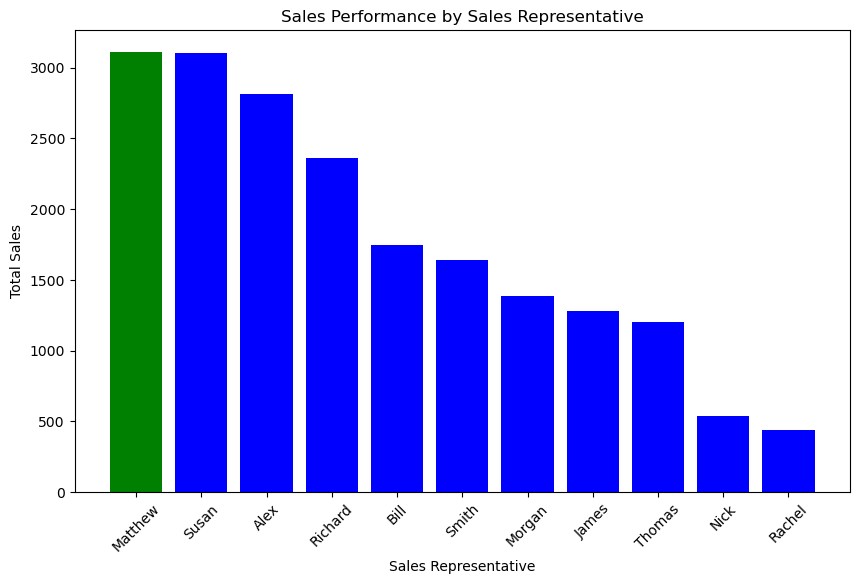

### 5. Average Profit Margin by Product Category

In analyzing our product categories, we find variations in average profit margins, with some categories outperforming others, as detailed below.

**Insight:** The average profit margin varies by product category, with some categories having higher margins than others. Here are the average profit margins for each product category:

- **Binder:** 0.49
- **Pen Set:** 0.21
- **Pencil:** 0.11
- **Pen:** 0.10
- **Desk:** 0.09

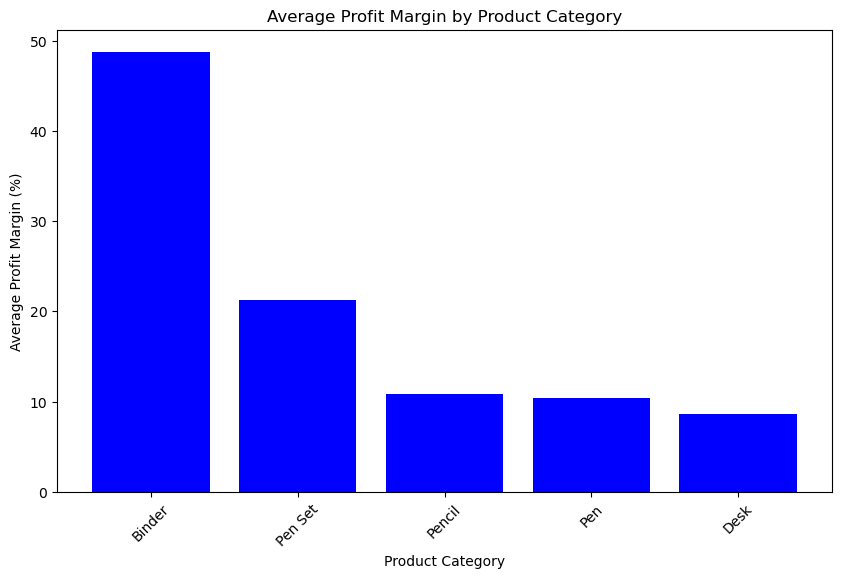


### 6. Highest and Lowest Selling Products and Product Offering Considerations

In our sales analysis, we delve into our highest and lowest selling products, and whether adjustments to our product offerings may be warranted. The graph below visualizes these findings, followed by key insights."

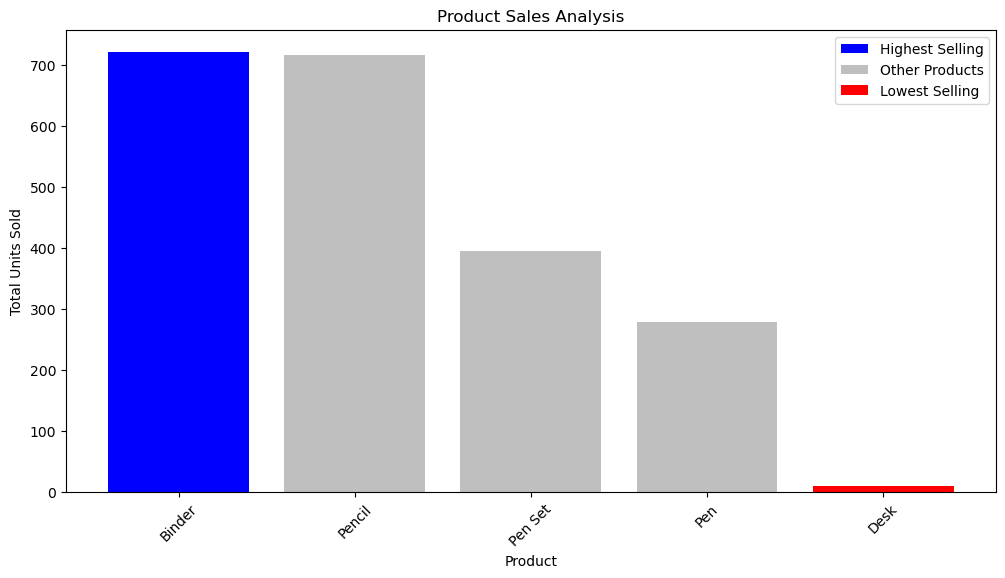

**Insight: In our analysis, we identify that "Binder" stands out as the highest-selling product, while "Pencil" ranks as the lowest-selling product.**

### 7. Inventory Management Analysis: Overstocked and Slow-Moving Items

Our inventory analysis reveals that several items are either overstocked or slow-moving, highlighting potential areas for improvement in our inventory management strategy. 

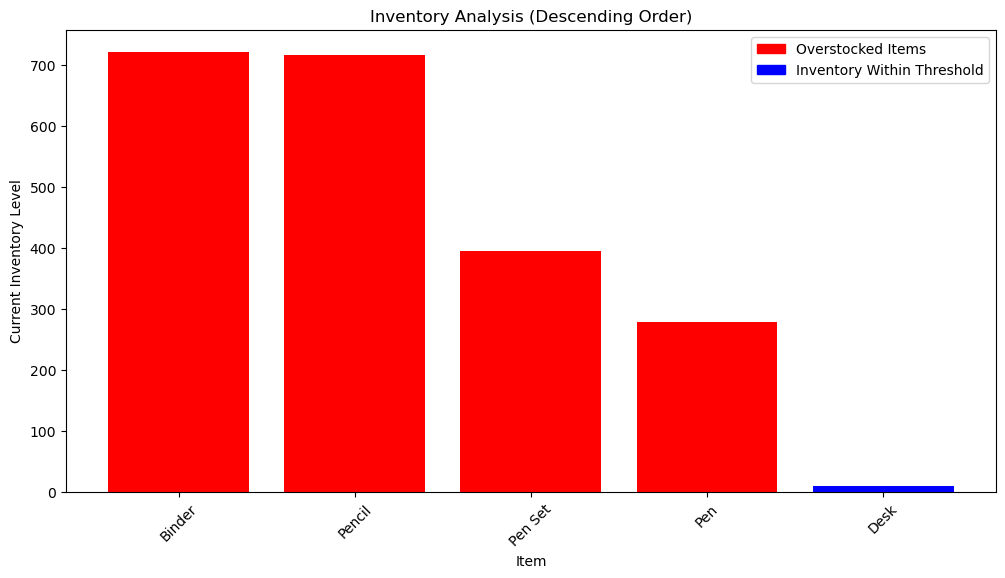

**Insight: Notably, the items 'Binder,' 'Pen,' 'Pen Set,' and 'Pencil' are identified as overstocked, while 'Desk' is the exception, indicating a need for further attention to optimize our inventory levels.**


### 8. Identifying Seasonal Sales Trends

**Introduction:**
In this analysis, we examine our sales data to identify any recurring seasonal trends. Understanding these patterns can help us better prepare for seasonal fluctuations, adjust our inventory, and tailor our marketing efforts to maximize sales during peak periods.

**Graph:**
Below is a decomposition of our sales data into its original, trend, seasonal, and residual components:

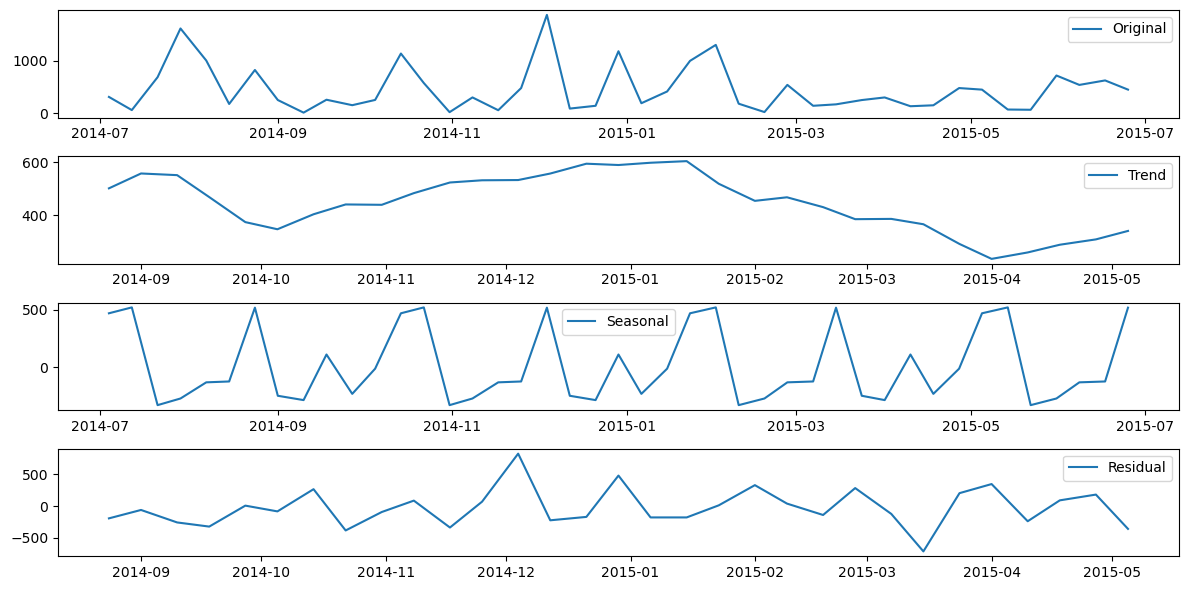

**Observation:**
- *Original Time Series:*
  - Notable high peaks occur after the 8th and 12th months in 2014, suggesting potential seasonality patterns corresponding to certain months.

- *Trend Component:*
  - A decrease in the trend is observed from September 2014 to October 2014, followed by an increase until January 2015. This indicates short-term variations within the overall trend.

- *Seasonal Component:*
  - The seasonal component displays a recurring pattern involving significant peaks, declines, small peaks, and declines. This suggests seasonality in sales, with certain months or seasons being stronger than others.

- *Residual Component:*
  - Residual fluctuations are noted in mid-March and mid-April 2015, not aligning with the typical seasonal pattern. These fluctuations may be due to factors not captured by the seasonal and trend components.

**Insight:**
- Seasonal sales patterns should be considered in inventory planning and marketing efforts. Understanding these patterns can help adjust inventory levels and marketing strategies to align with the peaks and troughs in sales during specific months or seasons. Additionally, analyzing residuals can identify irregularities that may require further investigation or model refinement.

*Please Note: The provided observations and insights are based on the analysis of the seasonal decomposition of the sales data.*


## Recommendations

Based on the analysis, here are some recommendations:

- Investigate the decline in sales of the "Pen Set" category and consider strategies to boost sales.
- Focus attention on regions with lower sales performance to improve market presence.
- Analyze the sales strategies of top-performing sales representatives to identify best practices.
- Continue to monitor and adjust inventory levels for overstocked and slow-moving items.
- Plan marketing and inventory strategies to align with seasonal sales trends.

This report provides a foundation for data-driven decision-making and further analysis to optimize our office supplies business.
